In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from scipy import stats
import math as mt
from math import sqrt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
# reading csv files
data1 = pd.read_csv('C:/Users/akhilesh rai/OneDrive/Desktop/Project/Proj2_Test.csv', header=0)
data2 = pd.read_csv('C:/Users/akhilesh rai/OneDrive/Desktop/Project/Proj2_Train.csv', header=0)

In [3]:
data1.head()

,Sl No,Sample ID,Age,Ob_Score,BMI,Consistency_Score,Position_Score,Effacement_Score,Dialation_Score,Station_Score,Total_Bishop_Score,Cerv_Len_cms,Cerv_Wid_cms,Induction,Del_mode
0,1,D1,21,G1,30.4,2,0,1,1,0,4,NaN,NaN,1,1
1,2,D2,24,G1,23.5,2,1,1,1,0,5,NaN,NaN,1,0
2,3,D3,23,G1,25.7,2,0,0,1,0,3,NaN,NaN,1,1
3,4,D4,20,G1,27.6,2,0,1,1,0,5,NaN,NaN,1,0
4,5,D5,25,G1,27.4,2,0,0,1,0,3,NaN,NaN,1,0


In [4]:
data2.head()

,Sl No,Sample ID,Age,Ob_Score,BMI,Consistency_Score,Position_Score,Effacement_Score,Dialation_Score,Station_Score,Total_Bishop_Score,Cerv_Len_cms,Cerv_Wid_cms,Induction,Del_mode
0,1,DT1,20,G1,28.255713,2,0,0,1,0,3,NaN,NaN,1,1
1,2,DT2,21,G1,29.772191,2,0,1,1,0,4,NaN,NaN,1,1
2,3,DT3,21,G1,28.511248,2,0,1,1,0,4,NaN,NaN,1,1
3,4,DT4,22,G1,28.772695,2,0,1,1,0,4,NaN,NaN,1,1
4,5,DT5,22,G1,27.488918,2,0,0,1,0,3,NaN,NaN,1,1


In [5]:
data1 = data1.drop(columns = ['Sl No','Sample ID','Cerv_Len_cms','Cerv_Wid_cms','Consistency_Score'])

In [6]:
data2 = data2.drop(columns = ['Sl No','Sample ID','Cerv_Len_cms','Cerv_Wid_cms','Consistency_Score'])

In [7]:
data1.head()

,Age,Ob_Score,BMI,Position_Score,Effacement_Score,Dialation_Score,Station_Score,Total_Bishop_Score,Induction,Del_mode
0,21,G1,30.4,0,1,1,0,4,1,1
1,24,G1,23.5,1,1,1,0,5,1,0
2,23,G1,25.7,0,0,1,0,3,1,1
3,20,G1,27.6,0,1,1,0,5,1,0
4,25,G1,27.4,0,0,1,0,3,1,0


In [8]:
data2.head()

,Age,Ob_Score,BMI,Position_Score,Effacement_Score,Dialation_Score,Station_Score,Total_Bishop_Score,Induction,Del_mode
0,20,G1,28.255713,0,0,1,0,3,1,1
1,21,G1,29.772191,0,1,1,0,4,1,1
2,21,G1,28.511248,0,1,1,0,4,1,1
3,22,G1,28.772695,0,1,1,0,4,1,1
4,22,G1,27.488918,0,0,1,0,3,1,1


In [9]:
data1.shape
data2.shape

(1000, 10)

In [10]:
df=pd.concat([data1,data2],axis=0)

In [11]:
df.shape

(1100, 10)

In [12]:
df.head()

,Age,Ob_Score,BMI,Position_Score,Effacement_Score,Dialation_Score,Station_Score,Total_Bishop_Score,Induction,Del_mode
0,21,G1,30.4,0,1,1,0,4,1,1
1,24,G1,23.5,1,1,1,0,5,1,0
2,23,G1,25.7,0,0,1,0,3,1,1
3,20,G1,27.6,0,1,1,0,5,1,0
4,25,G1,27.4,0,0,1,0,3,1,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1100 non-null   int64  
 1   Ob_Score            1100 non-null   object 
 2   BMI                 1100 non-null   float64
 3   Position_Score      1100 non-null   int64  
 4   Effacement_Score    1100 non-null   int64  
 5   Dialation_Score     1100 non-null   int64  
 6   Station_Score       1100 non-null   int64  
 7   Total_Bishop_Score  1100 non-null   int64  
 8   Induction           1100 non-null   int64  
 9   Del_mode            1100 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 94.5+ KB


In [14]:
df= df.drop_duplicates()

In [15]:
df.shape

(1091, 10)

In [16]:
df.describe()

,Age,BMI,Position_Score,Effacement_Score,Dialation_Score,Station_Score,Total_Bishop_Score,Induction,Del_mode
count,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000
mean,23.056829,26.663327,0.513291,0.431714,0.470211,0.241063,3.659945,0.939505,0.316224
std,2.321514,2.537739,0.500053,0.506529,0.499341,0.436416,1.127976,0.238511,0.465215
min,18.000000,19.800000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,21.000000,24.815561,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000
50%,23.000000,26.600000,1.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000
75%,25.000000,28.619877,1.000000,1.000000,1.000000,0.000000,4.000000,1.000000,1.000000
max,32.000000,32.900000,1.000000,2.000000,1.000000,2.000000,7.000000,1.000000,1.000000


In [17]:
df_pi = df.copy()
df_pi[" "] = np.where(df_pi['Del_mode'] == 1 ,  "Normal", "Opration")

<AxesSubplot:ylabel=' '>

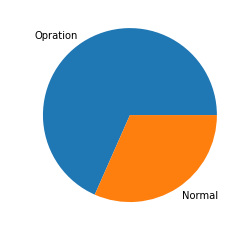

In [18]:
df_pi[" "].value_counts().plot(kind="pie")

In [19]:
print("Normal: " + str(len(df[df['Del_mode'] == 1])))
print("Opration: " + str(len(df[df['Del_mode'] == 0])))

Normal: 345
Opration: 746


In [20]:
df_1 = pd.get_dummies(df, columns = ['Ob_Score'])

In [21]:
df_1.head()

,Age,BMI,Position_Score,Effacement_Score,Dialation_Score,Station_Score,Total_Bishop_Score,Induction,Del_mode,Ob_Score_G1,Ob_Score_G2A1,Ob_Score_G3A2
0,21,30.4,0,1,1,0,4,1,1,1,0,0
1,24,23.5,1,1,1,0,5,1,0,1,0,0
2,23,25.7,0,0,1,0,3,1,1,1,0,0
3,20,27.6,0,1,1,0,5,1,0,1,0,0
4,25,27.4,0,0,1,0,3,1,0,1,0,0


In [22]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1091 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1091 non-null   int64  
 1   BMI                 1091 non-null   float64
 2   Position_Score      1091 non-null   int64  
 3   Effacement_Score    1091 non-null   int64  
 4   Dialation_Score     1091 non-null   int64  
 5   Station_Score       1091 non-null   int64  
 6   Total_Bishop_Score  1091 non-null   int64  
 7   Induction           1091 non-null   int64  
 8   Del_mode            1091 non-null   int64  
 9   Ob_Score_G1         1091 non-null   uint8  
 10  Ob_Score_G2A1       1091 non-null   uint8  
 11  Ob_Score_G3A2       1091 non-null   uint8  
dtypes: float64(1), int64(8), uint8(3)
memory usage: 88.4 KB


In [23]:
df_1.describe()

,Age,BMI,Position_Score,Effacement_Score,Dialation_Score,Station_Score,Total_Bishop_Score,Induction,Del_mode,Ob_Score_G1,Ob_Score_G2A1,Ob_Score_G3A2
count,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000
mean,23.056829,26.663327,0.513291,0.431714,0.470211,0.241063,3.659945,0.939505,0.316224,0.939505,0.040330,0.020165
std,2.321514,2.537739,0.500053,0.506529,0.499341,0.436416,1.127976,0.238511,0.465215,0.238511,0.196822,0.140629
min,18.000000,19.800000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,24.815561,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,23.000000,26.600000,1.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,25.000000,28.619877,1.000000,1.000000,1.000000,0.000000,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,32.000000,32.900000,1.000000,2.000000,1.000000,2.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
x = df_1.drop("Del_mode",axis = 1)
y= df_1["Del_mode"]
bestfeatures = SelectKBest(score_func = chi2,k=7)
fit =bestfeatures.fit(x,y)

In [25]:
feature_scores = pd.concat([pd.DataFrame(x.columns),pd.DataFrame(fit.scores_)],axis = 1)
feature_scores.columns = ["fetaures","scores"]
feature_scores.sort_values(by = 'scores',ascending = False)

,fetaures,scores
2,Position_Score,40.565489
9,Ob_Score_G2A1,38.289174
6,Total_Bishop_Score,16.589866
10,Ob_Score_G3A2,10.174263
1,BMI,9.293062
7,Induction,9.189328
3,Effacement_Score,8.224469
0,Age,6.470831
5,Station_Score,5.803549
8,Ob_Score_G1,0.663796


In [26]:
feature_scores.nlargest(5,'scores')

,fetaures,scores
2,Position_Score,40.565489
9,Ob_Score_G2A1,38.289174
6,Total_Bishop_Score,16.589866
10,Ob_Score_G3A2,10.174263
1,BMI,9.293062


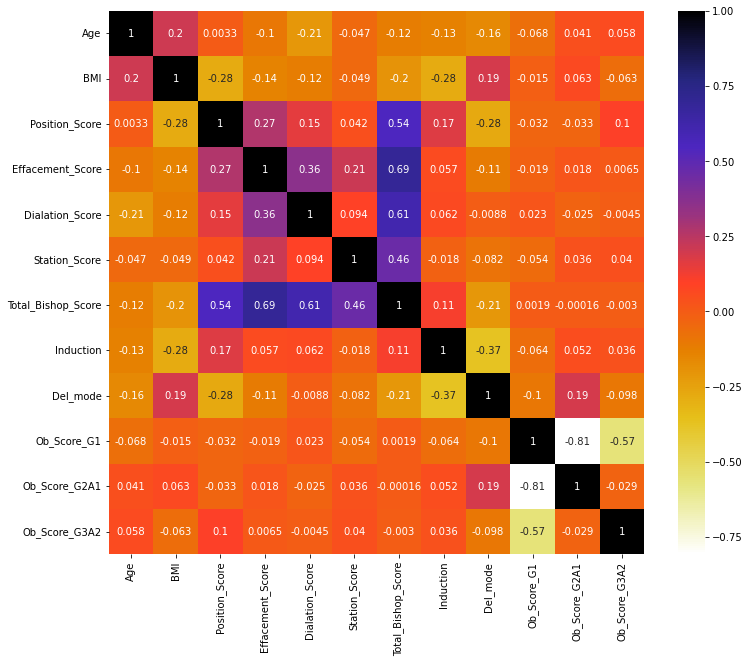

In [27]:
plt.figure(figsize = (12,10))
sns.heatmap(df_1.corr(), annot = True, cmap = plt.cm.CMRmap_r)
plt.show()

C:\Users\akhilesh rai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\akhilesh rai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\akhilesh rai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

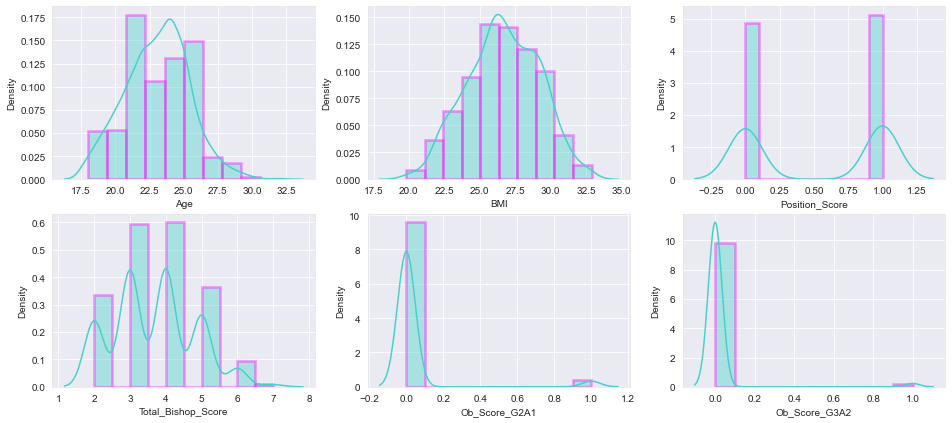

In [28]:
sns.set_style('darkgrid',{'axes.edgecolor': '.9'},)
f, ax = plt.subplots(2,3,figsize = (16,7))
plt.rcParams["patch.force_edgecolor"] = True
vis1 = sns.distplot(df_1["Age"],bins=10,color='mediumturquoise',
hist_kws=dict(edgecolor="magenta",linewidth=2.5),ax= ax[0][0])
vis2 = sns.distplot(df_1["BMI"],bins=10,color='mediumturquoise', hist_kws=dict(edgecolor="magenta",linewidth=2.5),ax=ax[0][1])
vis3 = sns.distplot(df_1["Position_Score"],bins=10,color='mediumturquoise', hist_kws=dict(edgecolor="magenta", linewidth=2.5),ax=ax[0][2])
vis4 = sns.distplot(df_1["Total_Bishop_Score"],bins=10,color='mediumturquoise', hist_kws=dict(edgecolor="magenta", linewidth=2.5), ax=ax[1][0])
vis5 =sns.distplot(df_1["Ob_Score_G2A1"],bins=10,color='mediumturquoise', hist_kws=dict(edgecolor="magenta", linewidth=2.5),ax=ax[1][1])
vis6 =sns.distplot(df_1["Ob_Score_G3A2"],bins=10,color='mediumturquoise', hist_kws=dict(edgecolor="magenta", linewidth=2.5),ax=ax[1][2])

C:\Users\akhilesh rai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\akhilesh rai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\akhilesh rai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

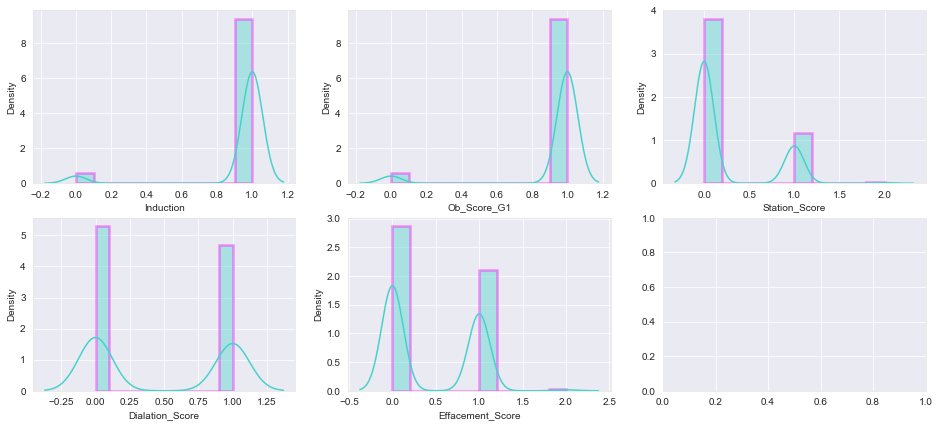

In [29]:
sns.set_style('darkgrid',{'axes.edgecolor': '.9'},)
f, ax = plt.subplots(2,3,figsize = (16,7))
plt.rcParams["patch.force_edgecolor"] = True
vis1 = sns.distplot(df_1["Induction"],bins=10,color='mediumturquoise',
hist_kws=dict(edgecolor="magenta",linewidth=2.5),ax= ax[0][0])
vis2 = sns.distplot(df_1["Ob_Score_G1"],bins=10,color='mediumturquoise', hist_kws=dict(edgecolor="magenta",linewidth=2.5),ax=ax[0][1])
vis3 = sns.distplot(df_1["Station_Score"],bins=10,color='mediumturquoise', hist_kws=dict(edgecolor="magenta", linewidth=2.5),ax=ax[0][2])
vis4 = sns.distplot(df_1["Dialation_Score"],bins=10,color='mediumturquoise', hist_kws=dict(edgecolor="magenta", linewidth=2.5), ax=ax[1][0])
vis5 =sns.distplot(df_1["Effacement_Score"],bins=10,color='mediumturquoise', hist_kws=dict(edgecolor="magenta", linewidth=2.5),ax=ax[1][1])

In [30]:
df_1.shape

(1091, 12)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Age'),
  Text(1, 0, 'BMI'),
  Text(2, 0, 'Position_Score'),
  Text(3, 0, 'Effacement_Score'),
  Text(4, 0, 'Dialation_Score'),
  Text(5, 0, 'Station_Score'),
  Text(6, 0, 'Total_Bishop_Score'),
  Text(7, 0, 'Induction'),
  Text(8, 0, 'Del_mode'),
  Text(9, 0, 'Ob_Score_G1'),
  Text(10, 0, 'Ob_Score_G2A1'),
  Text(11, 0, 'Ob_Score_G3A2')])

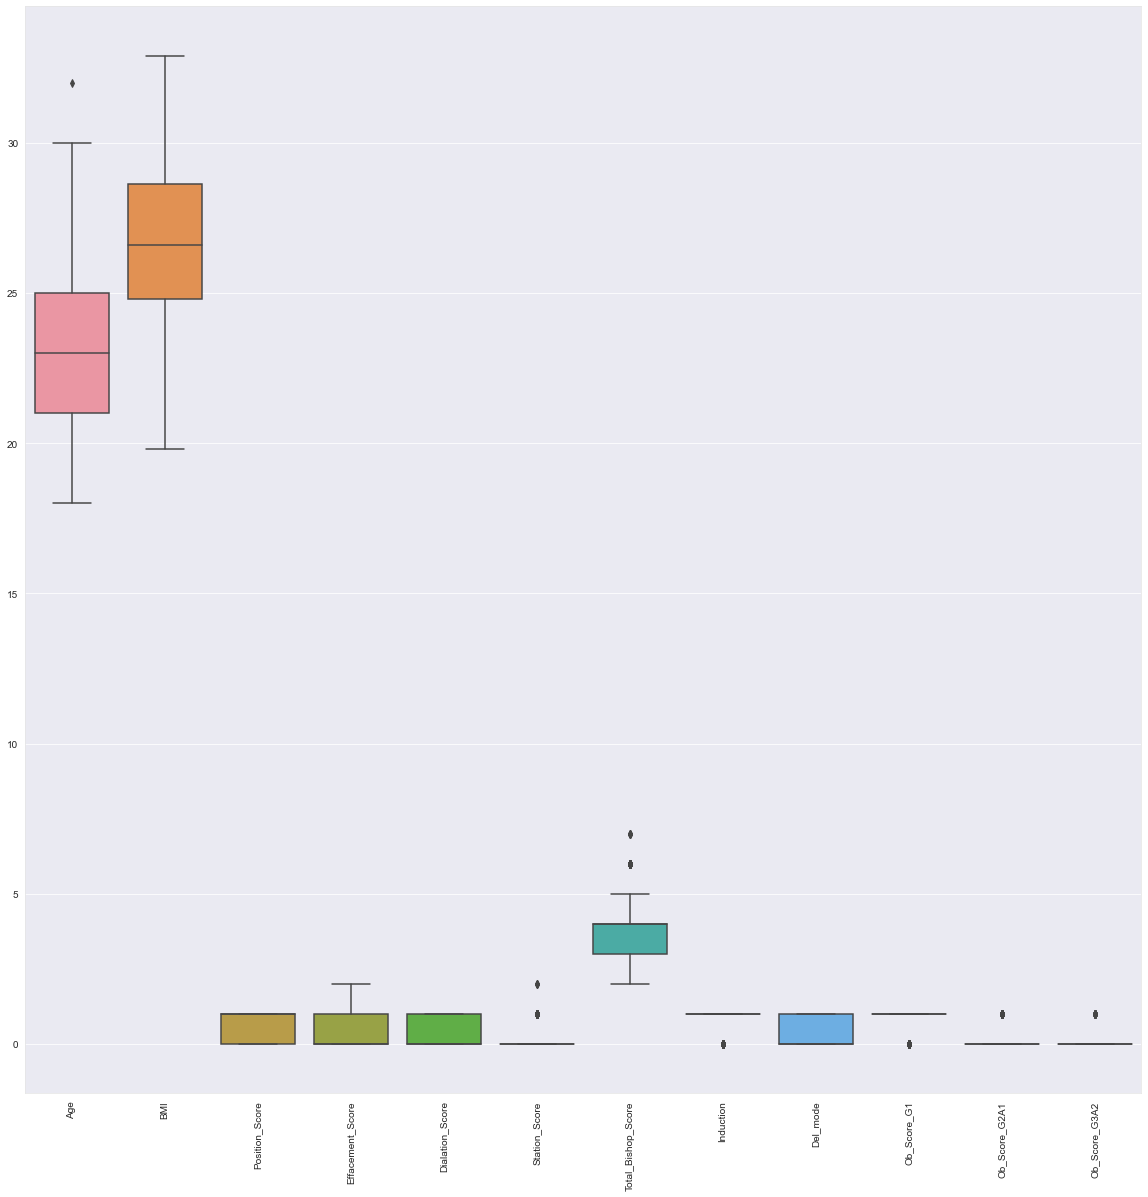

In [31]:
plt.figure(figsize=(20,20)) 
sns.boxplot(data=df_1)
plt.xticks(rotation=90)

In [32]:
df_1.quantile([.25,.5,.75],axis = 0)

,Age,BMI,Position_Score,Effacement_Score,Dialation_Score,Station_Score,Total_Bishop_Score,Induction,Del_mode,Ob_Score_G1,Ob_Score_G2A1,Ob_Score_G3A2
0.25,21.0,24.815561,0.0,0.0,0.0,0.0,3.0,1.0,0.0,1.0,0.0,0.0
0.50,23.0,26.600000,1.0,0.0,0.0,0.0,4.0,1.0,0.0,1.0,0.0,0.0
0.75,25.0,28.619877,1.0,1.0,1.0,0.0,4.0,1.0,1.0,1.0,0.0,0.0


In [33]:
df_1.describe()

,Age,BMI,Position_Score,Effacement_Score,Dialation_Score,Station_Score,Total_Bishop_Score,Induction,Del_mode,Ob_Score_G1,Ob_Score_G2A1,Ob_Score_G3A2
count,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000
mean,23.056829,26.663327,0.513291,0.431714,0.470211,0.241063,3.659945,0.939505,0.316224,0.939505,0.040330,0.020165
std,2.321514,2.537739,0.500053,0.506529,0.499341,0.436416,1.127976,0.238511,0.465215,0.238511,0.196822,0.140629
min,18.000000,19.800000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,24.815561,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,23.000000,26.600000,1.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,25.000000,28.619877,1.000000,1.000000,1.000000,0.000000,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,32.000000,32.900000,1.000000,2.000000,1.000000,2.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
column = df_1.columns

In [35]:
column

Index(['Age', 'BMI', 'Position_Score', 'Effacement_Score', 'Dialation_Score',
       'Station_Score', 'Total_Bishop_Score', 'Induction', 'Del_mode',
       'Ob_Score_G1', 'Ob_Score_G2A1', 'Ob_Score_G3A2'],
      dtype='object')

In [36]:
IQR = df_1['BMI'].quantile(0.75) - df_1['BMI'].quantile(0.25)
Upper_Limit = df_1['BMI'].quantile(0.75) + 1.5 * IQR
Lower_Limit = df_1['BMI'].quantile(0.25) - 1.5 * IQR

In [37]:
print('IQR is:',IQR)

IQR is: 3.804315585000001


In [38]:
print('Upper Limit is:',Upper_Limit)

Upper Limit is: 34.3263502725


In [39]:
print('Lower Limit is:',Lower_Limit)

Lower Limit is: 19.109087932499996


In [40]:
df_2 = df_1['BMI']

In [41]:
outlier = []
for x in df_2:
    if (x>Upper_Limit) or (x<Lower_Limit):
        outlier.append(x)

In [42]:
print(outlier)

[]


In [43]:
def outliers(df,field):
    IQR = df[field].quantile(0.75) - df[field].quantile(0.25)
    Upper_Limit = df[field].quantile(0.65) + 1.5 * IQR
    Lower_Limit = df[field].quantile(0.25) - 1.5 * IQR
    ls = df.index[(df[field]<Lower_Limit) | (df[field]>Upper_Limit)]
    return ls

index_list = []

for feature in column:
    index_list.extend(outliers(df_1,feature))

In [44]:
index_list

[37,
 14,
 17,
 18,
 19,
 23,
 28,
 48,
 49,
 51,
 52,
 53,
 54,
 55,
 64,
 65,
 67,
 70,
 73,
 74,
 75,
 76,
 80,
 86,
 87,
 94,
 95,
 98,
 72,
 78,
 90,
 92,
 93,
 95,
 96,
 97,
 98,
 99,
 101,
 102,
 106,
 107,
 109,
 115,
 118,
 190,
 195,
 196,
 202,
 204,
 206,
 229,
 236,
 239,
 251,
 252,
 253,
 260,
 263,
 264,
 265,
 267,
 268,
 289,
 291,
 292,
 293,
 294,
 295,
 296,
 298,
 300,
 301,
 302,
 303,
 305,
 307,
 308,
 309,
 310,
 313,
 315,
 318,
 371,
 376,
 390,
 393,
 394,
 395,
 397,
 399,
 400,
 401,
 404,
 407,
 408,
 409,
 413,
 420,
 426,
 428,
 431,
 432,
 433,
 435,
 437,
 438,
 451,
 453,
 454,
 455,
 556,
 592,
 595,
 597,
 600,
 602,
 605,
 614,
 616,
 617,
 622,
 624,
 625,
 626,
 628,
 630,
 631,
 633,
 634,
 635,
 636,
 637,
 638,
 639,
 640,
 642,
 644,
 645,
 646,
 648,
 649,
 650,
 651,
 653,
 654,
 655,
 659,
 660,
 662,
 664,
 665,
 666,
 668,
 669,
 670,
 671,
 672,
 673,
 674,
 675,
 676,
 685,
 689,
 701,
 715,
 730,
 732,
 733,
 734,
 735,
 737,
 738,


In [45]:
def remove_outliers(df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [46]:
df_1 = remove_outliers(df_1,index_list)

In [47]:
df_1.shape

(687, 12)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Age'),
  Text(1, 0, 'BMI'),
  Text(2, 0, 'Position_Score'),
  Text(3, 0, 'Effacement_Score'),
  Text(4, 0, 'Dialation_Score'),
  Text(5, 0, 'Station_Score'),
  Text(6, 0, 'Total_Bishop_Score'),
  Text(7, 0, 'Induction'),
  Text(8, 0, 'Del_mode'),
  Text(9, 0, 'Ob_Score_G1'),
  Text(10, 0, 'Ob_Score_G2A1'),
  Text(11, 0, 'Ob_Score_G3A2')])

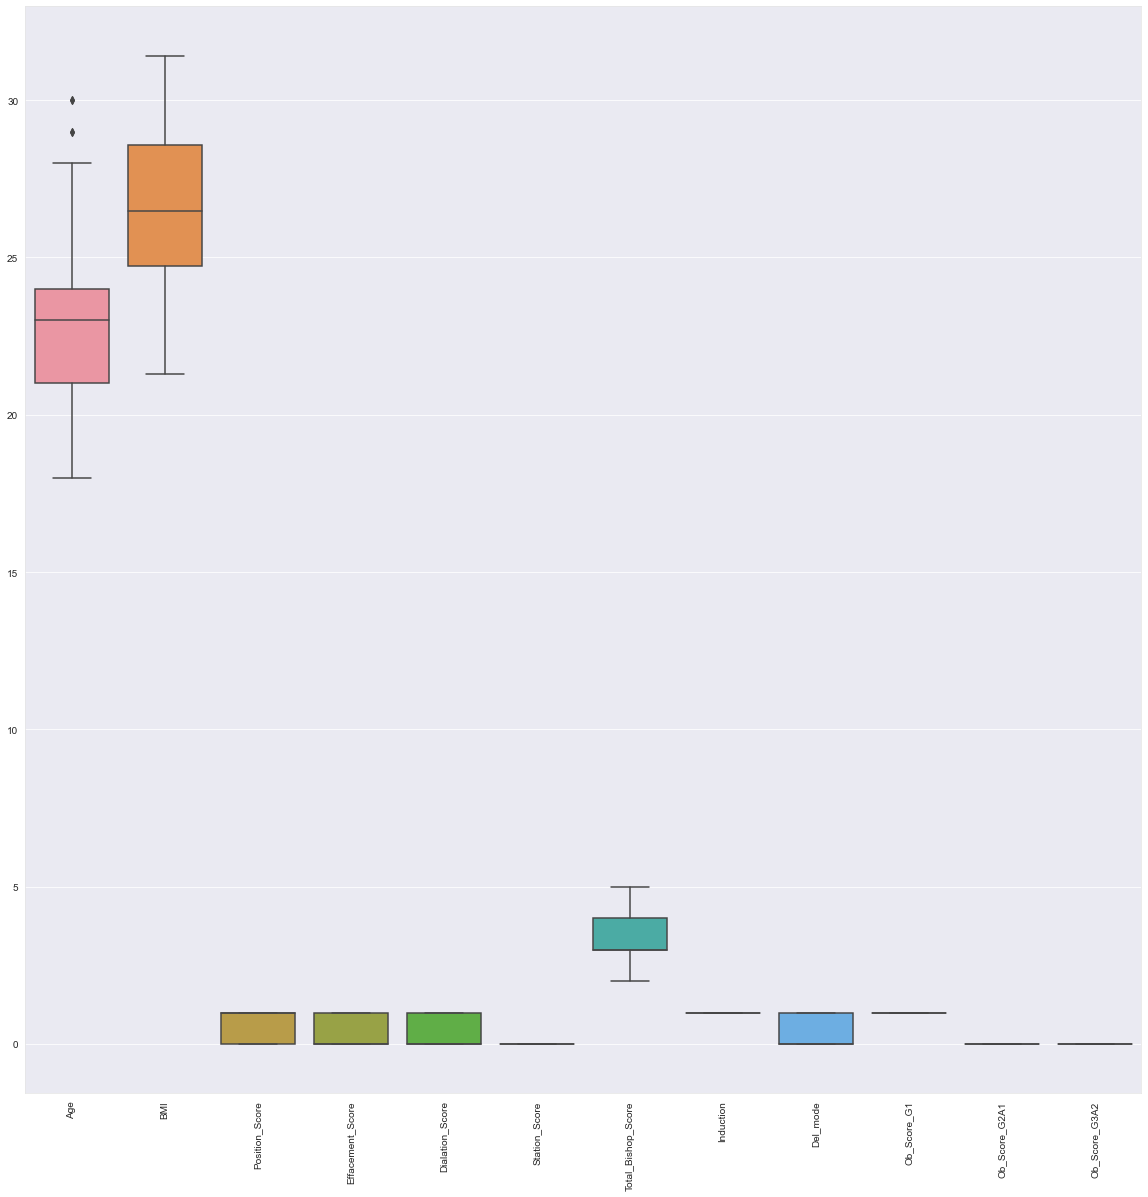

In [48]:
plt.figure(figsize=(20,20)) 
sns.boxplot(data=df_1)
plt.xticks(rotation=90)

In [49]:
X = df_1.drop('Del_mode', axis = 1)
Y = df_1['Del_mode']

In [50]:
X.shape


(687, 11)

In [51]:
Y.shape

(687,)

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size = 0.8,stratify=Y,random_state = 12345)

In [54]:
X_train.shape

(549, 11)

In [55]:
X_test.shape

(138, 11)

In [56]:
Y_train.shape

(549,)

In [57]:
Y_test.shape

(138,)

In [58]:
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

C:\Users\akhilesh rai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


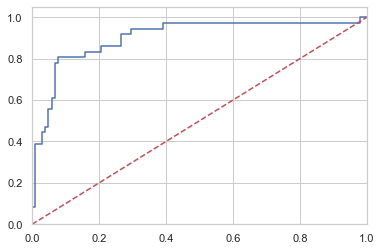

0.7393790849673202

In [59]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
logit_roc_auc = roc_auc_score(Y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()
logit_roc_auc

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [61]:
knn = KNeighborsClassifier(n_neighbors=8,metric='euclidean')
knn.fit(X_train,Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=8)

In [62]:
import warnings
warnings.filterwarnings("ignore")
b=[]

for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i,metric='euclidean')
    knn.fit(X_train,Y_train)
    Y_pred = knn.predict(X_test)
    
    a=accuracy_score(Y_test,Y_pred)
 
    print(f"Accuracy when k={i} = {a}")
   
    b.append(accuracy_score(Y_test,Y_pred))
   
print(max(b)) 

Accuracy when k=1 = 0.9202898550724637
Accuracy when k=2 = 0.9130434782608695
Accuracy when k=3 = 0.927536231884058
Accuracy when k=4 = 0.9492753623188406
Accuracy when k=5 = 0.9420289855072463
Accuracy when k=6 = 0.9492753623188406
Accuracy when k=7 = 0.9565217391304348
Accuracy when k=8 = 0.9347826086956522
Accuracy when k=9 = 0.9347826086956522
0.9565217391304348


In [63]:
import warnings
warnings.filterwarnings("ignore")
c=[]
for i in range(2,10):
    knn = KNeighborsClassifier(n_neighbors=i,metric='euclidean')
    knn.fit(X_train,Y_train)
    Y_pred = knn.predict(X_train)
    a=accuracy_score(Y_train,Y_pred)
    print(f"Accuracy when k={i} = {a}")
    c.append(accuracy_score(Y_train,Y_pred))
print(max(c)) 

Accuracy when k=2 = 0.9599271402550091
Accuracy when k=3 = 0.9489981785063752
Accuracy when k=4 = 0.9471766848816029
Accuracy when k=5 = 0.936247723132969
Accuracy when k=6 = 0.9216757741347905
Accuracy when k=7 = 0.9234972677595629
Accuracy when k=8 = 0.907103825136612
Accuracy when k=9 = 0.9016393442622951
0.9599271402550091


Feature: 0, Score: 0.15836972343522562
Feature: 1, Score: 0.1834061135371179
Feature: 2, Score: 0.013100436681222715
Feature: 3, Score: 0.0023289665211062792
Feature: 4, Score: 0.020378457059679757
Feature: 5, Score: 0.0
Feature: 6, Score: 0.05822416302765647
Feature: 7, Score: 0.0
Feature: 8, Score: 0.0
Feature: 9, Score: 0.0
Feature: 10, Score: 0.0


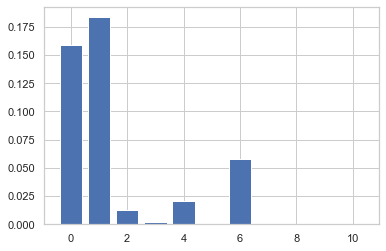

In [64]:
from sklearn.inspection import permutation_importance
results = permutation_importance(knn, X, Y, scoring='accuracy')
importance = results.importances_mean

for i,v in enumerate(importance):
    print(f'Feature: {i}, Score: {v}')

plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: 0, Score: 0.16098981077147018
Feature: 1, Score: 0.18748180494905384
Feature: 2, Score: 0.007569141193595352
Feature: 3, Score: 0.0011644832605531396
Feature: 4, Score: 0.020378457059679757
Feature: 5, Score: 0.0
Feature: 6, Score: 0.05997088791848617
Feature: 7, Score: 0.0
Feature: 8, Score: 0.0
Feature: 9, Score: 0.0
Feature: 10, Score: 0.0


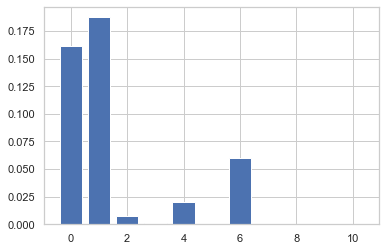

In [65]:
from sklearn.inspection import permutation_importance
results = permutation_importance(knn, X, Y, scoring='accuracy')
importance = results.importances_mean

for i,v in enumerate(importance):
    print(f'Feature: {i}, Score: {v}')

plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [66]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, log_loss
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [67]:
rc = RidgeClassifier()
print(rc)

rc.fit(X_train, Y_train)
score = rc.score(X_train, Y_train)
print("Score: ", score)

cv_scores = cross_val_score(rc, X_train, Y_train, cv=10)
print("CV average score: %.2f" % cv_scores.mean())

Y_pred = rc.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

cr = classification_report(Y_test, Y_pred)
print(cr) 

RidgeClassifier()
Score:  0.7577413479052824
CV average score: 0.75
[[101   1]
 [ 26  10]]
              precision    recall  f1-score   support

           0       0.80      0.99      0.88       102
           1       0.91      0.28      0.43        36

    accuracy                           0.80       138
   macro avg       0.85      0.63      0.65       138
weighted avg       0.82      0.80      0.76       138



In [68]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [69]:
XGB = XGBClassifier()
XGB.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [70]:
Y_pred = XGB.predict(X_test)
predictions = [round(value) for value in Y_pred]

In [71]:
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 92.75%


In [72]:
Y_pred = XGB.predict(X_train)
predictions = [round(value) for value in Y_pred]

In [73]:
accuracy = accuracy_score(Y_train, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.82%


In [74]:
from sklearn.ensemble import AdaBoostClassifier

In [75]:
# Import Support Vector Classifier
from sklearn.svm import SVC
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
svc=SVC(probability=True, kernel='linear')

# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)

# Train Adaboost Classifer
model = abc.fit(X_train, Y_train)

#Predict the response for test dataset
Y_pred = model.predict(X_test)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.7391304347826086


In [76]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
ADA = abc.fit(X_train, Y_train)

#Predict the response for test dataset
Y_pred = ADA.predict(X_test)

In [77]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.8623188405797102


In [78]:
# Split dataset into training set and test set
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1,random_state=500)

In [79]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, Y_train)

#Predict the response for test dataset
Y_pred = clf.predict(X_test)



In [80]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.8405797101449275


In [81]:
print("Precision:",metrics.precision_score(Y_test, Y_pred))

print("Recall:",metrics.recall_score(Y_test, Y_pred))

Precision: 0.6
Recall: 0.46153846153846156


In [82]:
from sklearn.ensemble import RandomForestClassifier
naive_rfc = RandomForestClassifier()
naive_rfc.fit(X_train, Y_train)
naive_test_preds = naive_rfc.predict(X_test)

In [83]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [84]:
print("The accuracy is {}".format(accuracy_score(Y_test, naive_test_preds)))
print("The precision is {}".format(precision_score(Y_test, naive_test_preds)))
print("The recall is {}".format(recall_score(Y_test, naive_test_preds)))

The accuracy is 0.9565217391304348
The precision is 0.9166666666666666
The recall is 0.8461538461538461


In [85]:
from sklearn.model_selection import GridSearchCV

In [86]:
def print_results(results):
    print('Best Param:{}\n'.format(results.best_params_))
    
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    
    for means,stds,params in zip(means,stds,results.cv_results_['params']):
        print('{}(+/-{} for {})'.format(round(means,3),round(stds*2,3),params))

In [87]:
rf = RandomForestClassifier(oob_score = True)
parameters = {'n_estimators':[50,100,300,400],}
cv = GridSearchCV(rf,parameters,cv=11)
cv.fit(X_train, Y_train.values.ravel())
print_results(cv)

Best Param:{'n_estimators': 100}

0.932(+/-0.075 for {'n_estimators': 50})
0.939(+/-0.068 for {'n_estimators': 100})
0.935(+/-0.079 for {'n_estimators': 300})
0.937(+/-0.073 for {'n_estimators': 400})


In [88]:
cv.score(X_test,Y_test)

0.9565217391304348

In [89]:
cv.score(X_train,Y_train)

1.0

In [90]:
rf = RandomForestClassifier(n_estimators = 400)
rf.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=400)

In [91]:
print("Train Accuracy :",rf.score(X_train, Y_train))
print("Test Accuracy :",rf.score(X_test, Y_test))

Train Accuracy : 1.0
Test Accuracy : 0.9565217391304348


In [92]:
y_pred_test = rf.predict(X_test)

In [93]:
y_pred_test = rf.predict(X_test)

In [94]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90        56
           1       0.60      0.46      0.52        13

    accuracy                           0.84        69
   macro avg       0.74      0.70      0.71        69
weighted avg       0.83      0.84      0.83        69



In [95]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, Y_train) 
pred_train_lasso= model_lasso.predict(X_train)
pred_test_lasso= model_lasso.predict(X_test) 

In [96]:
print(np.sqrt(mean_squared_error(Y_train,pred_train_lasso)))

0.39799439273250303


In [97]:
print(r2_score(Y_train, pred_train_lasso))

0.1937228831140958


In [98]:
print(np.sqrt(mean_squared_error(Y_test,pred_test_lasso)))

0.3911687731446352
